<a href="https://colab.research.google.com/github/jpbasco/challengeTelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos = pd.read_json(url)
#datos.info()
#datos.head()

#🔧 Transformación

In [ ]:
norm_customer = pd.json_normalize(datos['customer'])
norm_phone = pd.json_normalize(datos['phone'])
norm_internet = pd.json_normalize(datos['internet'])
norm_account = pd.json_normalize(datos['account'])

datos = datos.drop(columns=['customer']).join(norm_customer)
datos = datos.drop(columns=['phone']).join(norm_phone)
datos = datos.drop(columns=['internet']).join(norm_internet)
datos = datos.drop(columns=['account']).join(norm_account)

datos.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
valores_churn = pd.unique(datos['Churn'])
#valores_churn
datos['Churn'] = datos['Churn'].replace('','Sin informacion')
valores_churn

array(['No', 'Yes', ''], dtype=object)

In [ ]:
valores_PaymetMethod = pd.unique(datos['PaymentMethod'])
valores_PaymetMethod

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
valores_ChargesTotal = pd.unique(datos['Charges.Total'])
valores_ChargesTotal


array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [ ]:
datos['Charges.Total'] = (datos['Charges.Total'].replace(' ', 0))

In [ ]:
datos['Cuentas_Diarias'] = datos['Charges.Monthly'] / 30
datos.head()
#datos.info()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


#📊 Carga y análisis

In [ ]:
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337
std,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.425000,1.180833
50%,0.000000,29.000000,70.300000,2.343333
75%,0.000000,55.000000,89.875000,2.995833
max,1.000000,72.000000,118.750000,3.958333


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
conteo = datos['Churn'].value_counts()
conteo

,count
Churn,
No,5174
Yes,1869
Sin informacion,224


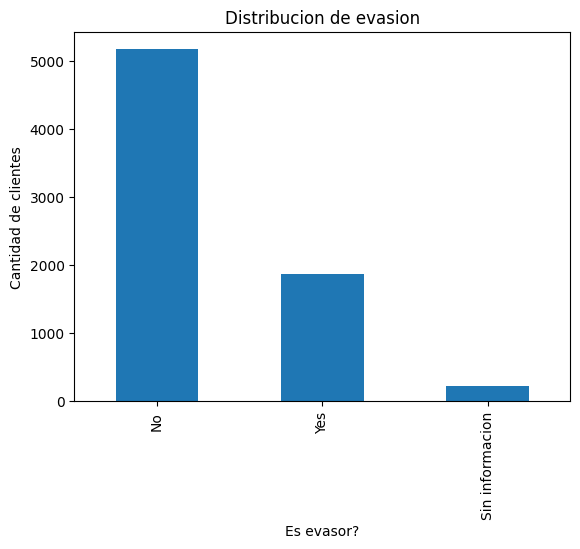

In [ ]:
conteo.plot(kind='bar')
plt.title('Distribucion de evasion')
plt.xlabel('Es evasor?')
plt.ylabel('Cantidad de clientes')
plt.show()


In [ ]:
data_churn = datos[['Churn','gender','Contract','PaymentMethod','Charges.Total','tenure']]
data_churn
#data_churn.describe()

,Churn,gender,Contract,PaymentMethod,Charges.Total,tenure
0,No,Female,One year,Mailed check,593.3,9
1,No,Male,Month-to-month,Mailed check,542.4,9
2,Yes,Male,Month-to-month,Electronic check,280.85,4
3,Yes,Male,Month-to-month,Electronic check,1237.85,13
4,Yes,Female,Month-to-month,Mailed check,267.4,3
...,...,...,...,...,...,...
7262,No,Female,One year,Mailed check,742.9,13
7263,Yes,Male,Month-to-month,Electronic check,1873.7,22
7264,No,Male,Month-to-month,Mailed check,92.75,2
7265,No,Male,Two year,Mailed check,4627.65,67


In [ ]:
conteo_genero = pd.crosstab(data_churn['Churn'], data_churn['gender'])
conteo_genero

gender,Female,Male
Churn,,
No,2549,2625
Sin informacion,104,120
Yes,939,930


In [ ]:
conteo_contrato = pd.crosstab(data_churn['Churn'], data_churn['Contract'])
conteo_contrato

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Sin informacion,130,46,48
Yes,1655,166,48


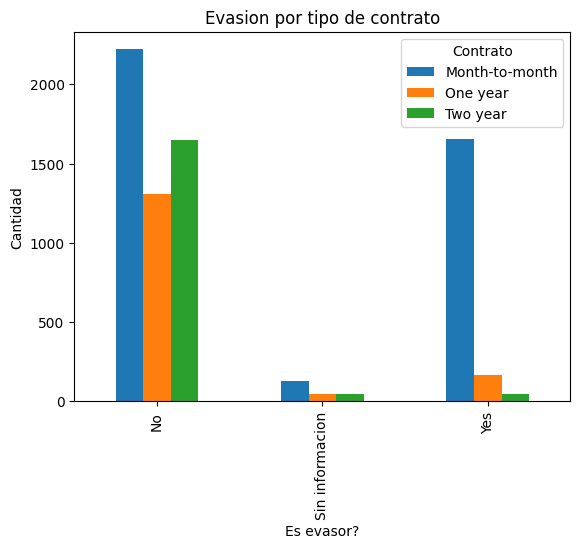

In [ ]:
conteo_contrato.plot(kind='bar')

plt.title("Evasion por tipo de contrato")
plt.xlabel("Es evasor?")
plt.ylabel("Cantidad")
plt.legend(title="Contrato")
plt.show()


In [ ]:
conteo_pago = pd.crosstab(data_churn['Churn'], data_churn['PaymentMethod'])
conteo_pago

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Sin informacion,45,46,80,53
Yes,258,232,1071,308


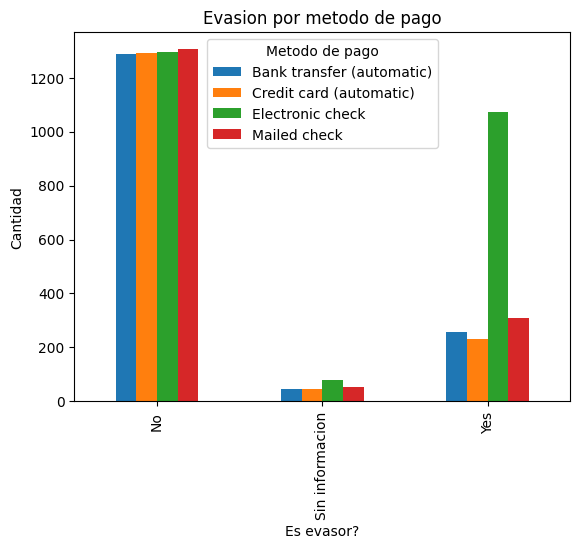

In [ ]:
conteo_pago.plot(kind='bar')

plt.title("Evasion por metodo de pago")
plt.xlabel("Es evasor?")
plt.ylabel("Cantidad")
plt.legend(title="Metodo de pago")
plt.show()

In [ ]:
conteo_tiempo = pd.crosstab(data_churn['Churn'], data_churn['tenure'])
conteo_gastado

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
No,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
Sin informacion,0,21,8,7,9,5,5,5,7,6,...,1,3,2,0,7,4,5,3,6,7
Yes,0,380,123,94,83,64,40,51,42,46,...,4,4,9,13,10,9,8,11,6,6


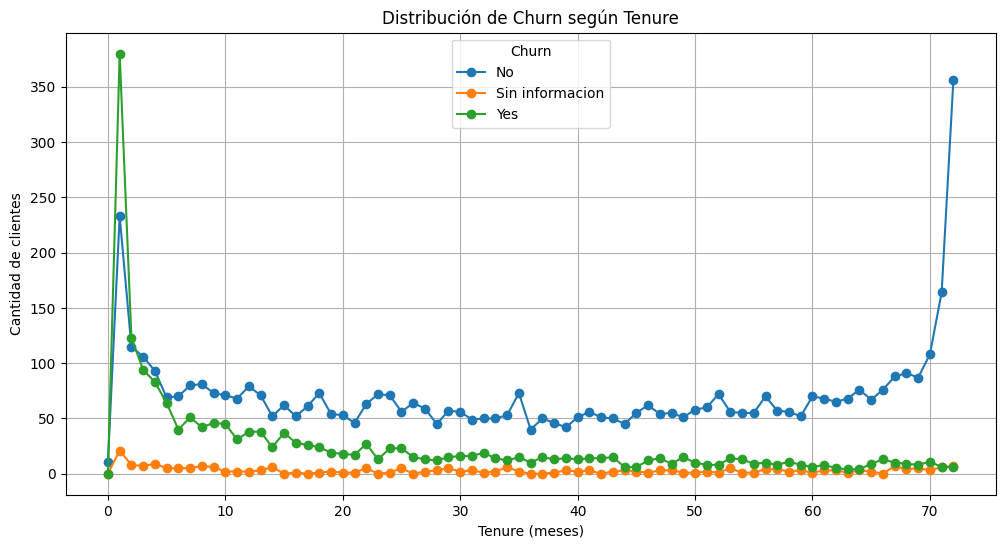

In [ ]:
plt.figure(figsize=(12,6))

for churn_status in conteo_tiempo.index:
    plt.plot(conteo_tiempo.columns, conteo_tiempo.loc[churn_status], marker='o', label=churn_status)

plt.title('Distribución de Churn según Tenure')
plt.xlabel('Tenure (meses)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.grid(True)
plt.show()

#📄Informe final

Análisis de Evasión de Clientes – Telecom X

Se realizó un análisis detallado sobre la evasión de clientes de Telecom X, entendida como la acción de dar de baja el servicio. Para ello, se siguió un proceso estructurado de ETL (Extract, Transform, Load):

Extracción (Extract): Se obtuvieron los datos de distintas fuentes, incluyendo registros de clientes, pagos, y estado de suscripción.

Transformación (Transform): Se limpiaron y normalizaron los datos, resolviendo inconsistencias, convirtiendo tipos de datos, manejando valores faltantes y aplanando estructuras complejas como diccionarios y listas dentro de columnas. Esto permitió generar un DataFrame homogéneo, listo para el análisis.

Carga (Load): Los datos transformados se cargaron en un formato único y consistente, apto para el análisis exploratorio y la generación de reportes.

Durante el análisis, se exploraron patrones de baja de servicio en función de variables como duración del contrato (tenure), método de pago y tipo de suscripción. Se identificaron tendencias claras en la evasión de clientes, permitiendo determinar factores de riesgo asociados a la pérdida de clientes.

Recomendaciones

A partir de los resultados obtenidos, se sugiere implementar las siguientes acciones para reducir la evasión:

Evitar contratos mes-a-mes: Los clientes con contratos mensuales presentan mayor probabilidad de dar de baja el servicio; incentivar planes de mayor duración puede aumentar la retención.

Evitar pagos mediante cheques electrónicos: Este método de pago se asocia con mayor tasa de evasión; promover métodos de pago más seguros y automáticos podría reducir las bajas.